In [2]:
import datasets as ds
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import logging
from sklearn.metrics import classification_report
from yellowbrick.classifier import ROCAUC
import os
from yellowbrick.classifier import ClassificationReport

In [11]:
ROOT_DIR = os.path.abspath(os.curdir)
ROOT_DIR

'/home/jovyan/projects/vector-nlp/notebooks'

In [4]:
ds.list_datasets()

['assin',
 'ar_res_reviews',
 'ambig_qa',
 'bianet',
 'ag_news',
 'ajgt_twitter_ar',
 'aeslc',
 'bc2gm_corpus',
 'air_dialogue',
 'acronym_identification',
 'afrikaans_ner_corpus',
 'allegro_reviews',
 'ade_corpus_v2',
 'adversarial_qa',
 'alt',
 'billsum',
 'amazon_polarity',
 'amttl',
 'ascent_kb',
 'big_patent',
 'bn_hate_speech',
 'bswac',
 'capes',
 'arsentd_lev',
 'bible_para',
 'amazon_reviews_multi',
 'ai2_arc',
 'beans',
 'anli',
 'arabic_pos_dialect',
 'best2009',
 'boolq',
 'ar_sarcasm',
 'asnq',
 'bnl_newspapers',
 'amazon_us_reviews',
 'arxiv_dataset',
 'banking77',
 'bookcorpus',
 'bprec',
 'c3',
 'allocine',
 'aslg_pc12',
 'biosses',
 'bbc_hindi_nli',
 'americas_nli',
 'biomrc',
 'blimp',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'arabic_speech_corpus',
 'arcd',
 'blended_skill_talk',
 'cail2018',
 'blbooksgenre',
 'bookcorpusopen',
 'bsd_ja_en',
 'atomic',
 'autshumato',
 'blog_authorship_corpus',
 'caner',
 'app_reviews',
 'arabic_billion_words',
 'art',
 'asset',
 'blbo

In [6]:
banking_df = ds.load_dataset('banking77',split='train')

Using custom data configuration default
Reusing dataset banking77 (/home/jovyan/.cache/huggingface/datasets/banking77/default/1.1.0/aec0289529599d4572d76ab00c8944cb84f88410ad0c9e7da26189d31f62a55b)


In [13]:
app_df = ds.load_dataset('app_reviews',split='train').to_pandas()

Using custom data configuration default
Reusing dataset app_reviews (/home/jovyan/.cache/huggingface/datasets/app_reviews/default/0.0.0/20335b51b604b9bc04b7be253cd8445caa9ba93f15f39a4b0492b9e9102853de)


In [9]:
banking_df.homepage

'https://github.com/PolyAI-LDN/task-specific-datasets'

In [16]:
banking_pd_df = banking_df.to_pandas()

In [24]:
banking_pd_df

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11
...,...,...
9998,You provide support in what countries?,24
9999,What countries are you supporting?,24
10000,What countries are getting support?,24
10001,Are cards available in the EU?,24


In [26]:
X = banking_pd_df.text
y = banking_pd_df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [15]:
app_df.head()

,package_name,review,date,star
0,com.mantz_it.rfanalyzer,Great app! The new version now works on my Bra...,October 12 2016,4
1,com.mantz_it.rfanalyzer,Great It's not fully optimised and has some is...,August 23 2016,4
2,com.mantz_it.rfanalyzer,Works on a Nexus 6p I'm still messing around w...,August 04 2016,5
3,com.mantz_it.rfanalyzer,The bandwidth seemed to be limited to maximum ...,July 25 2016,3
4,com.mantz_it.rfanalyzer,Works well with my Hackrf Hopefully new update...,July 22 2016,5


In [16]:
X = app_df.review
y = app_df.star
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [17]:
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)
X_train_tfidf

<201645x62842 sparse matrix of type '<class 'numpy.float64'>'
	with 1955296 stored elements in Compressed Sparse Row format>

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf,y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = log_reg.predict(X_test_tfidf)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))#,target_names=my_tags))

accuracy 0.6934968757232122
              precision    recall  f1-score   support

           1       0.61      0.63      0.62     11813
           2       0.30      0.04      0.08      3913
           3       0.34      0.11      0.17      7068
           4       0.43      0.13      0.20     11060
           5       0.74      0.95      0.83     52566

    accuracy                           0.69     86420
   macro avg       0.48      0.37      0.38     86420
weighted avg       0.63      0.69      0.63     86420



In [35]:
!pwd

/home/jovyan/projects/vector-nlp/notebooks


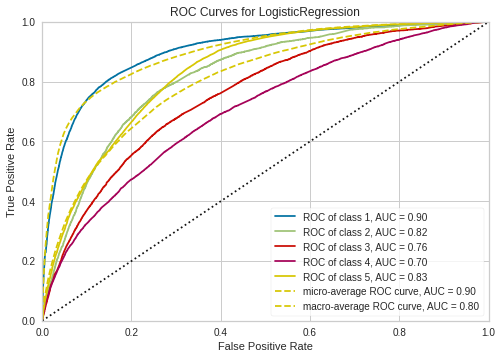

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
visualizer = ROCAUC(log_reg)#, classes=["win", "loss", "draw"])

visualizer.fit(X_train_tfidf, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_tfidf, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

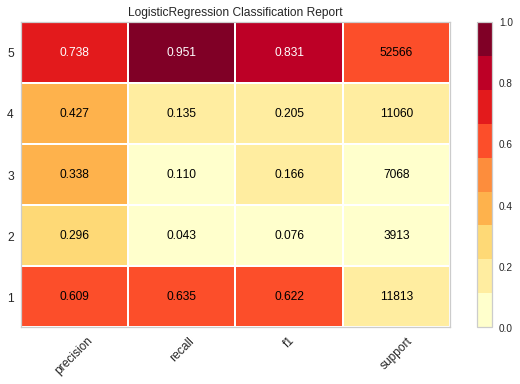

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [21]:
visualizer = ClassificationReport(log_reg,support=True)# classes=classes, support=True)

visualizer.fit(X_train_tfidf, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_tfidf, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [22]:
from yellowbrick.classifier import ConfusionMatrix

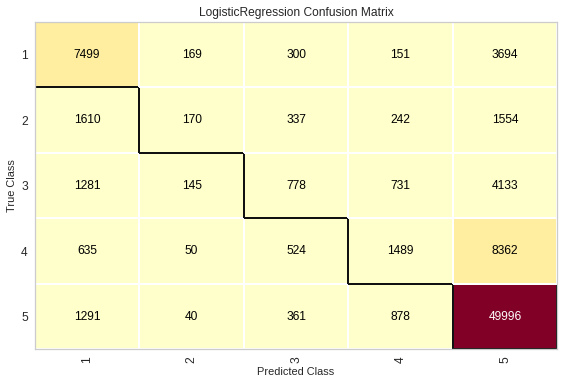

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [23]:
# import matplotlib
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(500, 500)
cm = ConfusionMatrix(log_reg) #classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_tfidf, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_tfidf, y_test)

# How did we do?
cm.show()